## Use the iris database to answer the following quesitons:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### What does the distribution of petal lengths look like?

In [2]:
iris = sns.load_dataset('iris')

iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

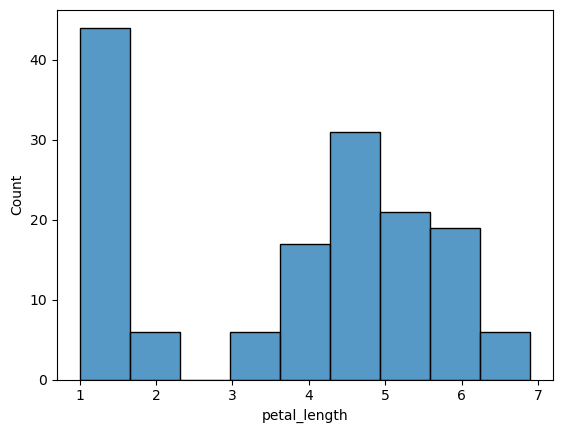

In [3]:
sns.histplot(iris.petal_length)
plt.show()

### Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

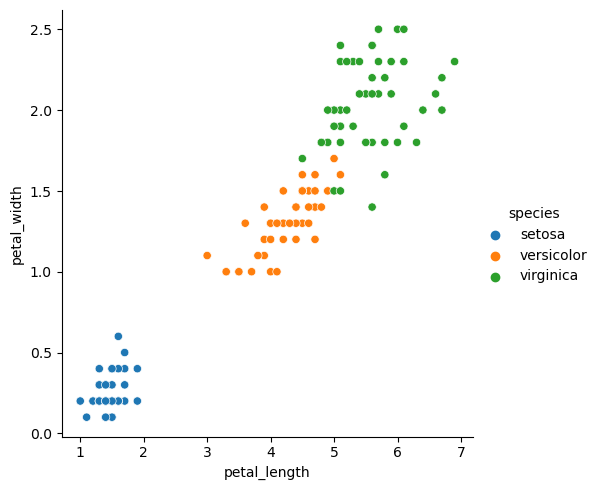

In [74]:
sns.relplot(x='petal_length', y='petal_width', hue='species' , data=iris)

# yes

### Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

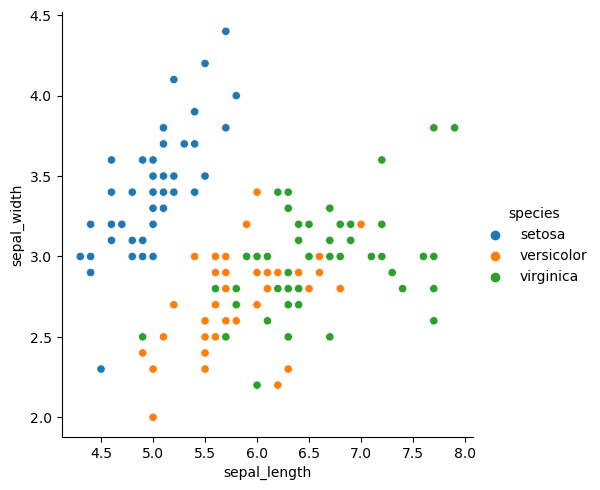

In [75]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris)

# no, not reasonable

### Which features would be best used to predict species?

- Through cursory examination of the two plots that we mapped out here, we can
say reasonably that petal length and width are stronger predictors of species
than sepal width and sepal length

## Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [10]:
anscombe = sns.load_dataset('anscombe')

anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [16]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

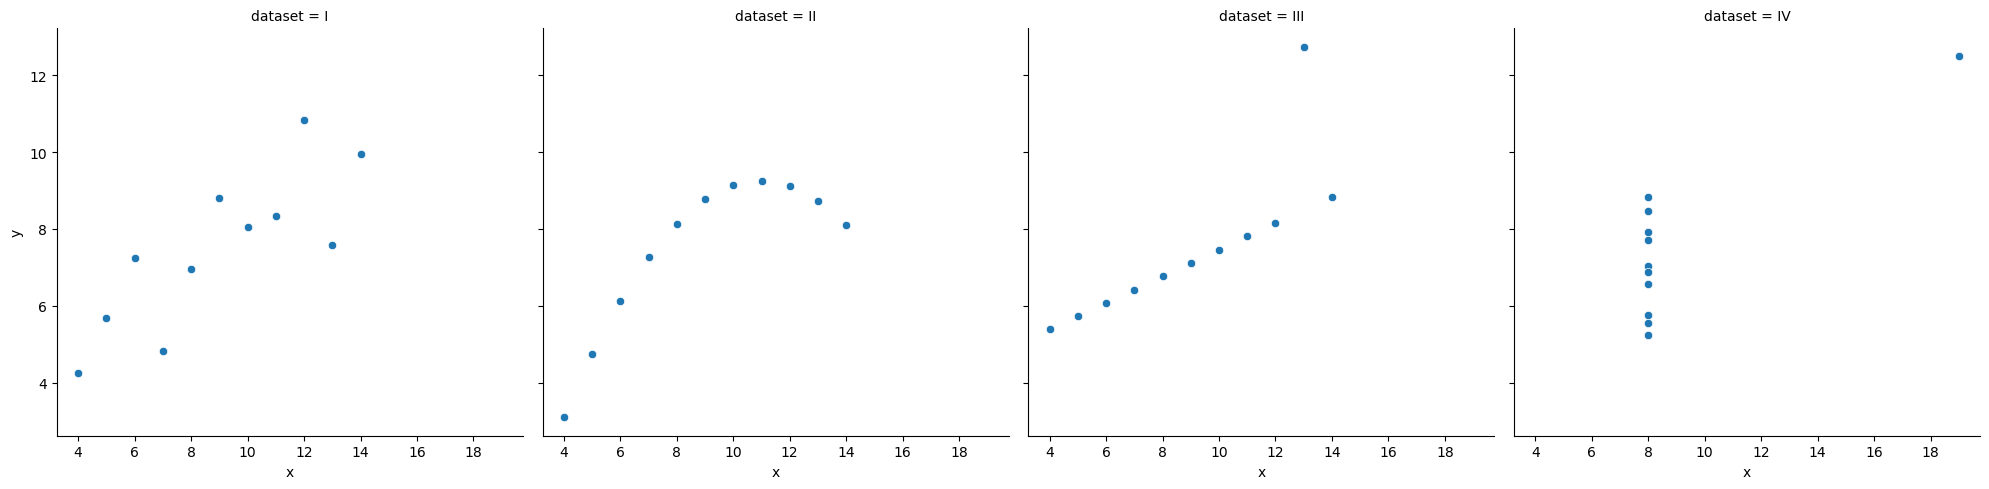

In [76]:
sns.relplot(data=anscombe, x='x', y='y', col='dataset')

### Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [22]:
from pydataset import data
sprays = data('InsectSprays')
sprays.dtypes

count     int64
spray    object
dtype: object

<AxesSubplot:xlabel='spray', ylabel='count'>

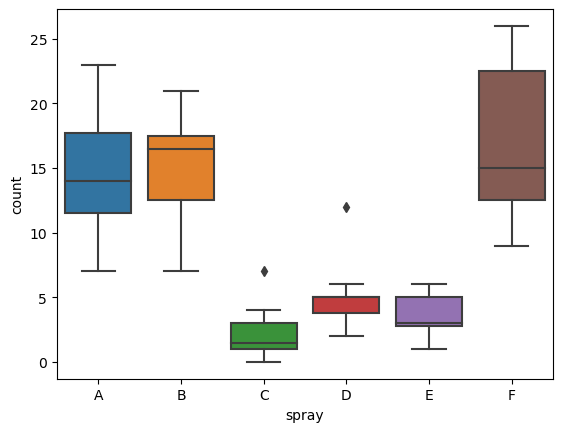

In [78]:
sns.boxplot(data=sprays, x='spray' , y='count')

## Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [80]:
swiss_df = data('swiss')
swiss_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [79]:
swiss_df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


#### Does whether or not a province is Catholic influence fertility?

In [81]:
swiss_df['is_catholic'] = swiss_df.Catholic > 50

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

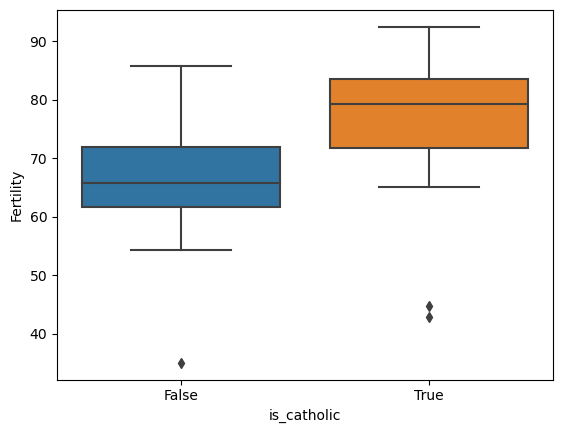

In [82]:
sns.boxplot(x='is_catholic', y='Fertility', data=swiss_df)

####  What measure correlates most strongly with fertility?

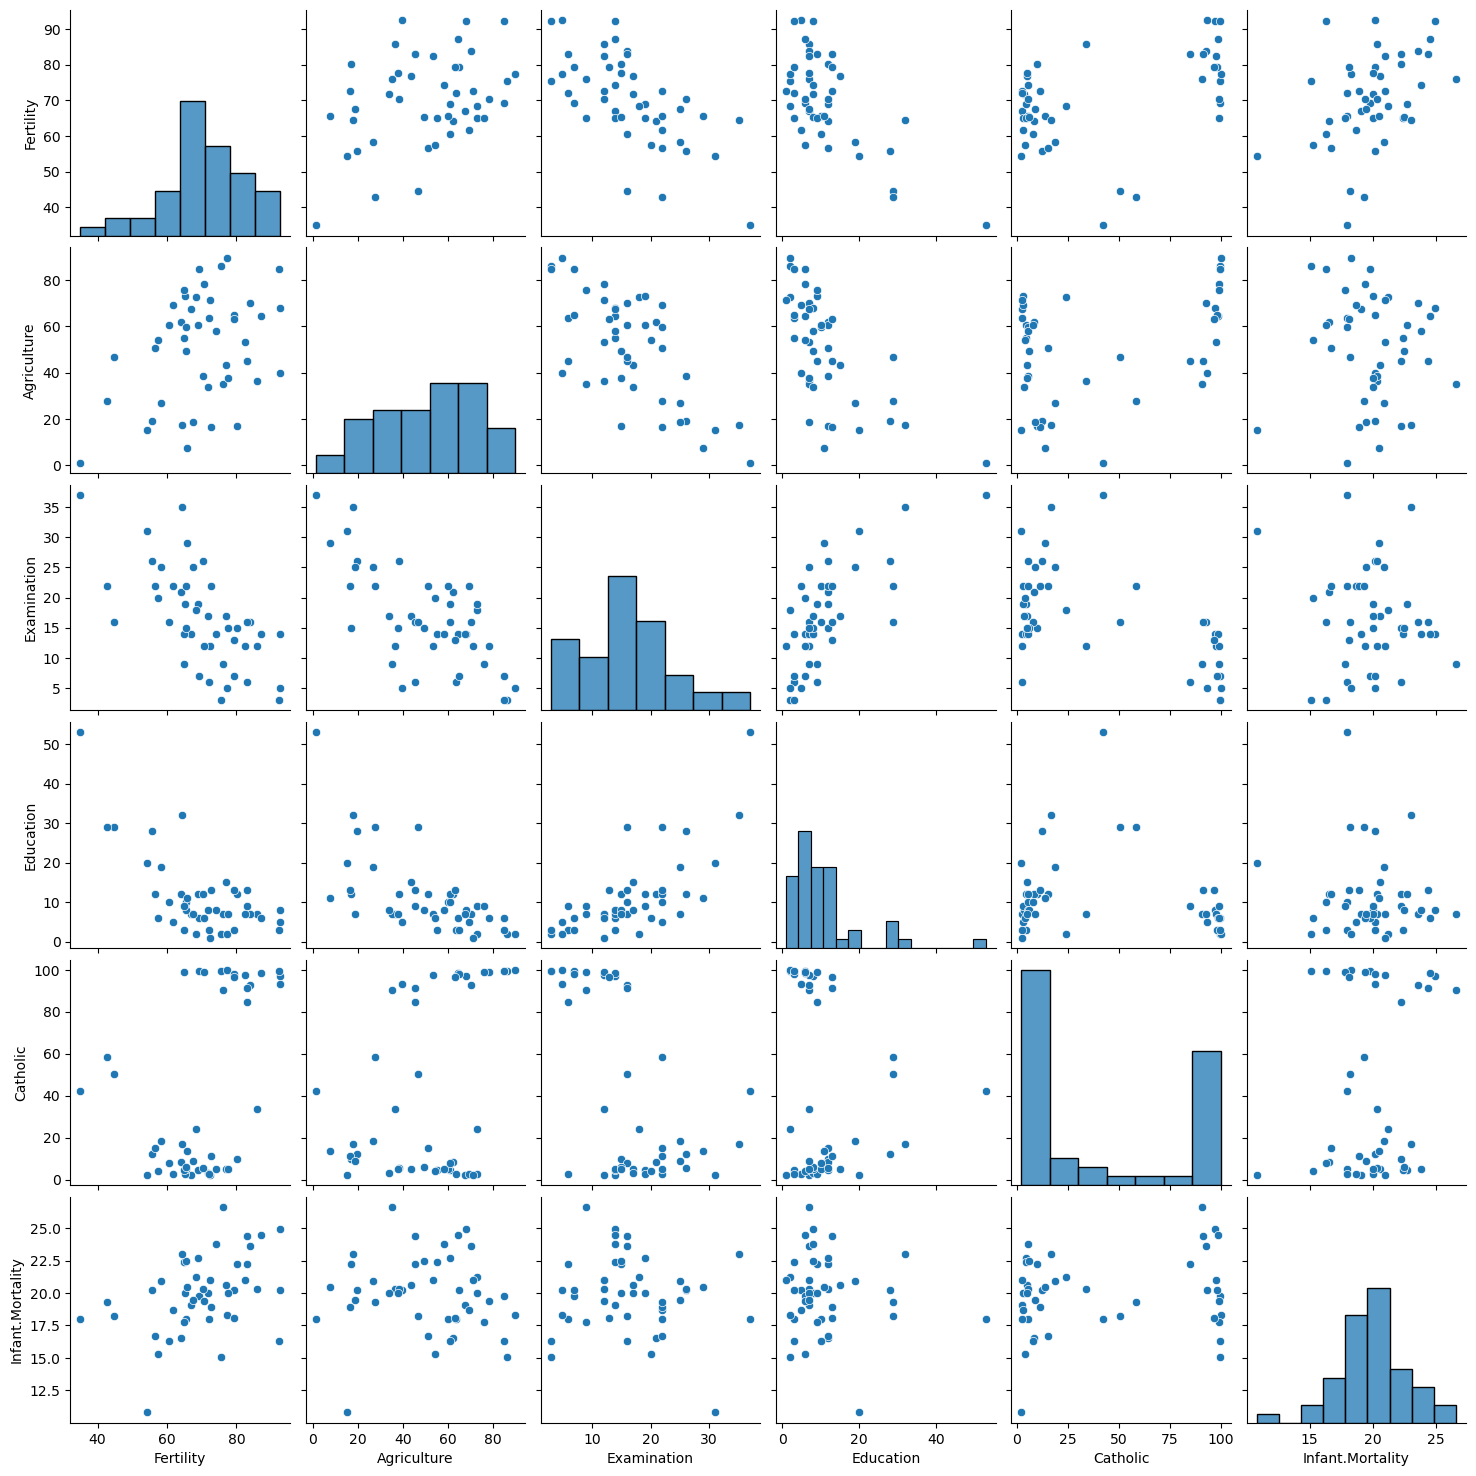

In [86]:
sns.pairplot(data=swiss_df.drop(columns='is_catholic'))

## Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [64]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'

In [87]:
chipotle_db = pd.read_sql('SELECT * FROM orders', url)
chipotle_db.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [91]:
chipotle_db[chipotle_db['item_name'] == 'Chicken Bowl']
# here we ananlize the pricing to see if quantity is considered in the item_price

,id,order_id,quantity,item_name,choice_description,item_price
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
13,14,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Cheese, Sour Cream, Guacamole]]",$11.25
19,20,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Sour Cream, Cheese, Lettu...",$8.75
26,27,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Beans, Rice, Fajita Veggies, Cheese, Sour C...",$8.49
...,...,...,...,...,...,...
4590,4591,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans, Cheese, Lettuce, Guacamole]]",$11.25
4591,4592,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce]]",$8.75
4595,4596,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Beans]]",$8.75
4599,4600,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",$8.75


In [92]:
chipotle_db['item_price']= chipotle_db.item_price.str.replace('$', '')
chipotle_db.head()

# here we removed the '$' from item price so the values can be treated as numbers

/var/folders/8k/klwd85kj0d3_n66z9ht0xg7r0000gn/T/ipykernel_37121/3654656357.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle_db['item_price']= chipotle_db.item_price.str.replace('$', '')


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98


In [113]:
top_items = chipotle_db.groupby('item_name').quantity.sum().sort_values(ascending=False).head(4)
top_items
# identitying the 4 most popular items per the exercise question

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [114]:
my_top_items = list(top_items.index)

In [115]:
orders_top = chipotle_db[chipotle_db.item_name.isin(my_top_items)]

In [121]:
summed_orders = orders_top.groupby('item_name').item_price.sum().reset_index
summed_orders

<bound method Series.reset_index of item_name
Chicken Bowl           16.98 10.98 11.25 8.75 8.49 11.25 8.75 8.75 8.75 8.75 11.25 11.25 11.25 11.25 17.50 8....
Chicken Burrito        8.49 8.49 10.98 8.49 10.98 10.98 8.75 10.98 8.75 8.75 8.75 8.75 8.49 8.49 8.75 8.49 10...
Chips and Guacamole    4.45 4.45 4.45 4.45 4.45 3.99 4.45 3.99 4.45 4.45 4.45 4.45 3.99 4.45 4.45 3.99 4.45 4...
Steak Burrito          11.75 9.25 8.99 11.75 8.99 8.99 8.99 8.99 8.99 8.99 8.99 8.99 8.99 9.25 8.99 11.48 17....
Name: item_price, dtype: object>

In [119]:
sns.barplot(data=summed_orders,
           x='item_name',
           y='item_price')

ValueError: Could not interpret input 'item_name'

## Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [122]:
sleep_df = data('sleepstudy')
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [123]:
sleep_df.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [126]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

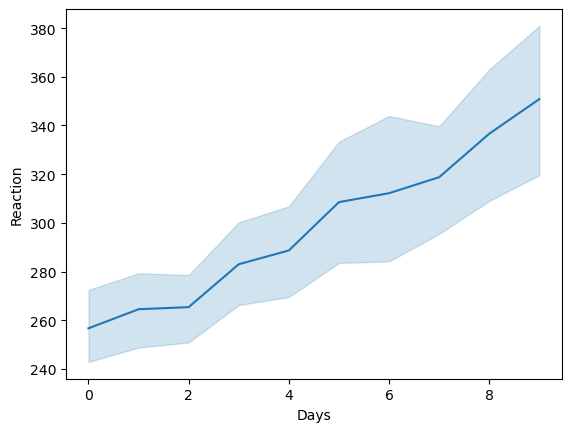

In [135]:
sns.lineplot(data=sleep_df,
            x='Days',
            y='Reaction',
            legend=False)